<a href="https://colab.research.google.com/github/erikluu/lab-1-phase-2-erikluu/blob/main/DATA_301_Lab_1B_Erik_Luu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


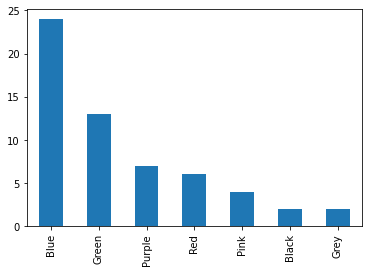

In [ ]:
# TYPE YOUR CODE HERE.
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def clean_data(c):
  if c.__contains__("blue") | c.__contains__("Blue") | c.__contains__("Navy"):
    return "Blue"
  if c.__contains__("green") | c.__contains__("Green") | c.__contains__("turquoise") | c.__contains__("Teal"):
    return "Green"
  if c.__contains__("Pink") | c.__contains__("pink"):
    return "Pink"
  if c.__contains__("Purple") | c.__contains__("purple") | c.__contains__("Magenta"):
    return "Purple"
  if c.__contains__("Black") | c.__contains__("black"):
    return "Black"
  if c.__contains__("Red") | c.__contains__("red"):
    return "Red"
  if c.__contains__("Gray") | c.__contains__("grey"):
    return "Grey"
  
  return c

df_301 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/lab1BResponses.csv")
df_colors = df_301["What is your favorite color?"].map(clean_data)
df_colors.value_counts().plot.bar()

**TYPE YOUR WRITTEN EXPLANATION HERE.**

Blue is by far the most popular color with 19 entries. The next color, green, is next with 9 votes. All the specific colors only have 1 entry--turqoise, dark green, navy, magenta, etc. I had to clean the data by removing extra spaces, slashes and entries with multiple colors. In the case of multiple colors, I only took the first color listed as the survey question asked for "Your favorite color", which is singular.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

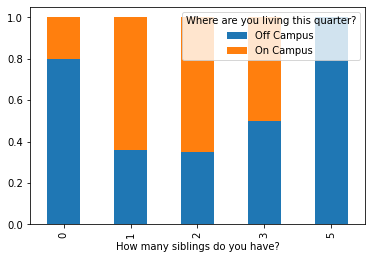

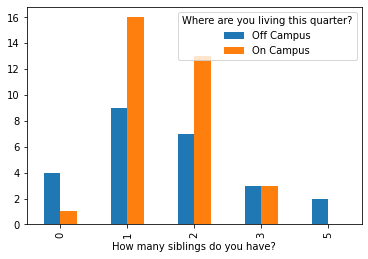

In [ ]:
# TYPE YOUR CODE HERE.
def inSLO(s):
  if "Off Campus, outside of SLO" == s:
    return "Off Campus"
  else:
    return "On Campus"

s_inSLO = df_301["Where are you living this quarter?"].map(inSLO)
jointed_siblings_living = pd.crosstab(s_inSLO, df_301["How many siblings do you have?"])

sum1 = jointed_siblings_living.sum(axis=0)

cond1 = jointed_siblings_living.divide(sum1, axis=1)
cond1.T.plot.bar(stacked=True)

jointed_siblings_living.T.plot.bar()

**TYPE YOUR WRITTEN EXPLANATION HERE.**
Before completing this question, I was thinking of the comparison between those living at home or away from home. However for this question, I speculated living with a lot of siblings, you would like to have your own space away from people. You are more likely to have this off campus. As this dataset suggest, the more sublings you have the less likely you will live on campus. It is hard to say with a such a small dataset.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

Majors vs Golf Balls:
MEAN: CS 1362881.869724138 MEDIAN 350000.0
MEAN: ST 480221.5333333333 MEDIAN 200000.0
MEAN: OT 674596.8571428572 MEDIAN 65000.0

Y Videogames MEAN: 874512.2938222223 MEDIAN: 250000.0
N Videogames MEAN: 1293707.6923076923 MEDIAN: 200000.0


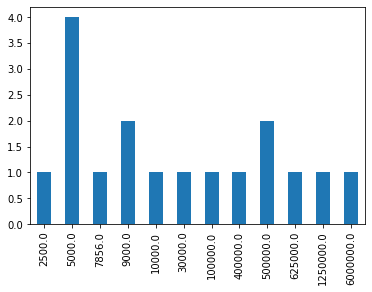

In [ ]:
# TYPE YOUR CODE HERE.
# Correct answer ~500,000 golf balls

s_balls = df_301['Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?']

print("Majors vs Golf Balls:")
df_csmajor = df_301[df_301['What is your major?'] == 'Computer Science']
cs_balls = df_csmajor['Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?']
cs_balls.value_counts().sort_index().plot.bar()

df_statmajor = df_301[df_301['What is your major?'] == 'Statistics']
stat_balls = df_statmajor['Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?']
stat_balls.value_counts().sort_index().plot.bar()

df_othermajor = df_301[df_301['What is your major?'] == 'Other']
other_balls = df_othermajor['Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?']
other_balls.value_counts().sort_index().plot.bar()

print("MEAN: CS", cs_balls.mean(), "MEDIAN", cs_balls.median())
print("MEAN: ST", stat_balls.mean(), "MEDIAN", stat_balls.median())
print("MEAN: OT", other_balls.mean(), "MEDIAN", other_balls.median())

# joint_balls_games = pd.crosstab(s_balls, df_301['Do you enjoy video games?'])
# sum_games = joint_balls_games.sum(axis=0)

df_yes_games = df_301[df_301['Do you enjoy video games?'] == "Yes"]
yes_balls = df_yes_games['Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?']
df_no_games = df_301[df_301['Do you enjoy video games?'] == "No"]
no_balls = df_no_games['Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?']
print("\nY Videogames MEAN:", yes_balls.mean(), "MEDIAN:", yes_balls.median())
print("N Videogames MEAN:", no_balls.mean(), "MEDIAN:", no_balls.median())





**TYPE YOUR WRITTEN EXPLANATION HERE.**
Majors vs Golf Balls:
MEAN: CS 1362881.869724138 MEDIAN 350000.0
MEAN: ST 480221.5333333333 MEDIAN 200000.0
MEAN: OT 674596.8571428572 MEDIAN 65000.0

Y Videogames MEAN: 874512.2938222223 MEDIAN: 250000.0
N Videogames MEAN: 1293707.6923076923 MEDIAN: 200000.0

When thinking about possible relationships, my mind went to majors and videogames. I chose majors because perhaps those with more math spatial education, aka more mathy majors, would have a better shot. I chose videogames because I have heard those who play are better at visualization and spatial awareness that others. 

For the majors, STAT majors, on average were the closest while CS majors were way off. I do not know what majors are in OTHER but they were second.

For videogames, it makes sense, from my earlier statement, that those who do play videogames would be, on average way closer. Even the median was closer than those who don't.

## Question 4

Write and answer your own question using this data set.

Is there any relationship between whether a student considers themselves as a sport fan and if they consider themselves as artistic? Please create a visualization of the relationship between the two student attributes.

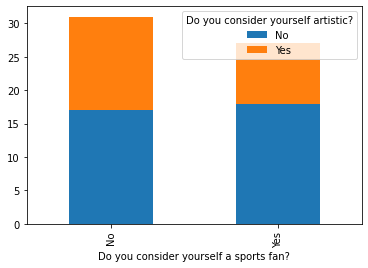

In [ ]:
ct_sports_art = pd.crosstab(df_301["Do you consider yourself a sports fan?"], df_301["Do you consider yourself artistic?"])
ct_sports_art.plot.bar(stacked = True)

It seems that a slight majority of the class did not identify as a sport fan, while it also seems that a slight majority also didn't identify as artistic as well. Between the two variables, it seems that a there is slightly greater chance that you do not consider yourself as artistic if you elected to claim that you were a sports fan.

In [ ]:
# Week 1 Challenge - Pretty Data

# import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')
# 
# df_301 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/lab1BResponses.csv")
# import squarify

# s_majors = df_301["What is your major?"]
# squarify.plot(sizes=s_majors.value_counts().tolist(), label=df_301["What is your major?"], alpha=4)